In [40]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [41]:
all_df = pd.read_excel("car.xlsx")

In [42]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [43]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [44]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [45]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [46]:
Y = all_df['class'].values.astype('int64')

In [47]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [48]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1382

In [49]:
train_Features[:4]

array([[3., 2., 2., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1.],
       [0., 2., 3., 0., 0., 2.],
       [2., 2., 0., 0., 1., 2.]])

In [50]:
train_Label.shape

(1382,)

In [51]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [52]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [53]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [54]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [55]:
model = Sequential()

In [56]:
model.add(Conv1D(filters=12*6,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(6,1), 
                 activation='relu'))

In [57]:
model.add(MaxPooling1D(pool_size=1))

In [58]:
model.add(Conv1D(filters=12*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [59]:
model.add(MaxPooling1D(pool_size=1))

In [60]:
model.add(Conv1D(filters=12*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [61]:
model.add(MaxPooling1D(pool_size=1))

In [62]:
model.add(Conv1D(filters=12*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [63]:
model.add(MaxPooling1D(pool_size=1))

In [64]:
model.add(Conv1D(filters=12*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [65]:
model.add(MaxPooling1D(pool_size=1))

In [66]:
model.add(Conv1D(filters=12,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [67]:
model.add(MaxPooling1D(pool_size=1))

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(6, activation='tanh'))

In [70]:
model.add(Dense(4,activation='softmax'))

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 6, 72)             144       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 6, 72)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 60)             4380      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 60)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 48)             2928      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 6, 48)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 36)             1764      
__________

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [73]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1)

Train on 1105 samples, validate on 277 samples
Epoch 1/30
1105/1105 [==============================] - 3s 3ms/step - loss: 1.3306 - acc: 0.5955 - val_loss: 1.1815 - val_acc: 0.7112
Epoch 2/30
1105/1105 [==============================] - 0s 147us/step - loss: 0.9349 - acc: 0.6814 - val_loss: 0.8430 - val_acc: 0.7076
Epoch 3/30
1105/1105 [==============================] - 0s 161us/step - loss: 0.7903 - acc: 0.6787 - val_loss: 0.8067 - val_acc: 0.7220
Epoch 4/30
1105/1105 [==============================] - 0s 256us/step - loss: 0.7564 - acc: 0.6824 - val_loss: 0.7756 - val_acc: 0.7148
Epoch 5/30
1105/1105 [==============================] - 0s 154us/step - loss: 0.7286 - acc: 0.7032 - val_loss: 0.7473 - val_acc: 0.7473
Epoch 6/30
1105/1105 [==============================] - 0s 151us/step - loss: 0.6975 - acc: 0.7466 - val_loss: 0.7197 - val_acc: 0.7473
Epoch 7/30
1105/1105 [==============================] - 0s 159us/step - loss: 0.6726 - acc: 0.7520 - val_loss: 0.6988 - val_acc: 0.7473
Epo

In [74]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

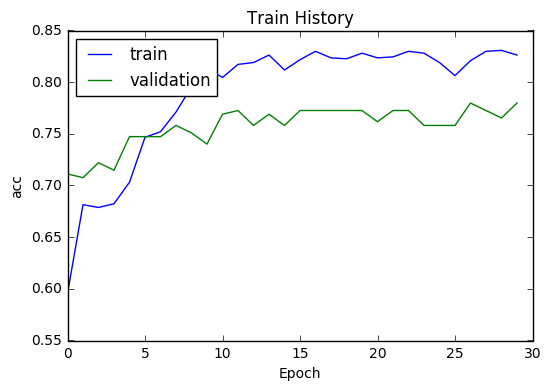

In [75]:
show_train_history(train_history,'acc','val_acc')

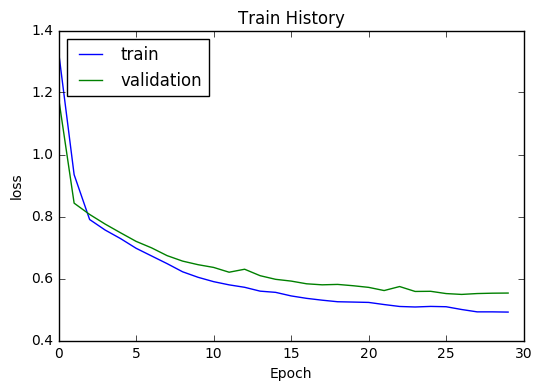

In [76]:
show_train_history(train_history,'loss','val_loss')

In [77]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

346/346 [==============================] - 0s 96us/step


In [78]:
scores[1]

0.8497109833480305